In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #this will be useful for random data 
from mpl_toolkits.mplot3d import Axes3D #3d planes
import matplotlib.patches as mpatches #adding colors to legends
from sklearn.svm import SVC #support vector machines



<Figure size 432x288 with 0 Axes>

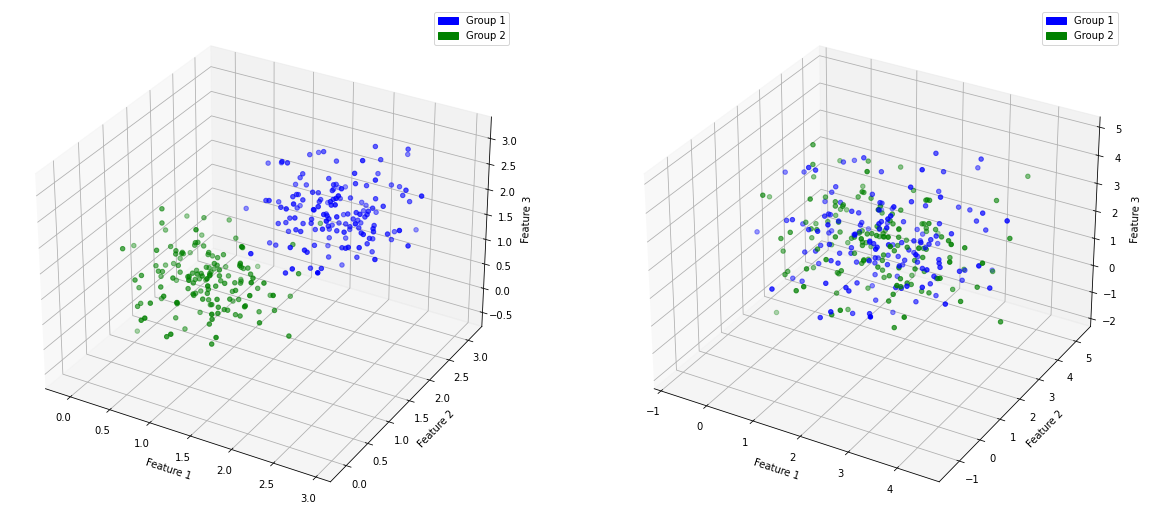

<Figure size 432x288 with 0 Axes>

In [57]:
#Q1 Pick up at random 2 families of points in R^3
x1, y1 = make_blobs(n_samples=300, centers=[[1,1,1], [2,2,2]], n_features=3, cluster_std=0.4, random_state=50)
x2, y2 = make_blobs(n_samples=300, centers=[[2,2,2], [2,2,2]], n_features=3, cluster_std=1, random_state=50)

x1.shape, y1.shape, x2.shape, y2.shape

fig = plt.figure(figsize=(20, 10))
for i, x, y in zip([1,2], [x1,x2], [y1,y2]):
    c = np.where(y==1, 'b', 'g')
    ax = fig.add_subplot(1, 2, i, projection='3d')
    ax.scatter(x[:,0], x[:,1], x[:, 2], c = c)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    blue_patch = mpatches.Patch(color='blue', label='Group 1')
    green_patch = mpatches.Patch(color='green', label='Group 2')
    plt.legend(handles=[blue_patch, green_patch])
plt.figure()


In [67]:
#2 Try to separate them linearly using the method explained  these last lectures.

kern = SVC(kernel = 'linear', probability = True) # linear kernel
lin = kern.fit(x1, y1).score(x1, y1)
print("linear kernel's accuracy: %f" % lin)
poly = kern.set_params(kernel='poly', degree = 3).fit(x1, y1).score(x1, y1) # polynomial of degree 3
print("polynomial kernel's accuracy: %f" % poly)
gauss = kern.set_params(kernel = 'rbf', gamma = 2).fit(x1, y1).score(x1, y1) #  gaussian kernel
print("gaussian kernel's accuracy: %f" % gauss)

#strong accuracy for both linearly

linear kernel's accuracy: 0.980000
polynomial kernel's accuracy: 0.986667
gaussian kernel's accuracy: 0.986667


In [83]:
#same thing for second dataset (nonseparated)

kern = SVC(kernel = 'linear', probability = True) # linear kernel
lin = kern.fit(x2, y2).score(x2, y2)
print("linear kernel's accuracy: %f" % lin)
poly = kern.set_params(kernel='poly', degree = 3).fit(x2, y2).score(x2, y2) # polynomial of degree 3
print("polynomial kernel's accuracy: %f" % poly)
gauss = kern.set_params(kernel = 'rbf', gamma = 2).fit(x2, y2).score(x2, y2) #  gaussian kernel
print("gaussian kernel's accuracy: %f" % gauss)

#really poor accuracy, but as expected from this dataset.

linear kernel's accuracy: 0.526667
polynomial kernel's accuracy: 0.526667
gaussian kernel's accuracy: 0.813333


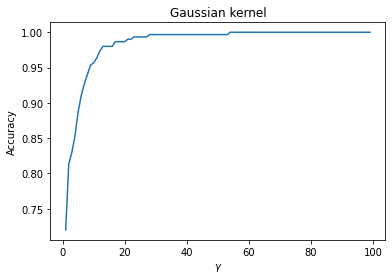

In [80]:
accuracy_x1 = []
gammas = np.arange(1, 100)
for i in gammas_:
    gauss = SVC(kernel='rbf', gamma=i)
    pre_x1 = gauss.fit(x2, y2).score(x2, y2)
    accuracy_x1.append(pre_x1)
    
plt.plot(gammas, accuracy_x1);
plt.xlabel('$\gamma$')
plt.ylabel('Accuracy')
plt.title('Gaussian kernel');

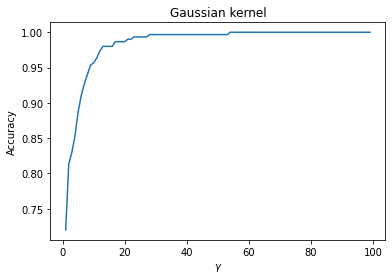

In [81]:

accuracy_x2 = []
for i in gammas:
    gauss = SVC(kernel='rbf', gamma=i)
    pre_x2 = gauss.fit(x2, y2).score(x2, y2)
    accuracy_x2.append(pre_x2)
    
plt.plot(gammas, accuracy_x2);
plt.xlabel('$\gamma$')
plt.ylabel('Accuracy')
plt.title('Gaussian kernel');

In [82]:
# We can see a fast increase in accuracy that will reach a plateau as gamma increases in value. 
# We know that SVM are really useful for higher dimensions and are considered as some of the best algorithms when
# classes are separable (this is the case with Gaussian). However, it seems to show great results here because
# we have a small dataset with a few number of parameters. One option to make it easier could be to format the dataset
# in a binary form.


In [ ]:
#4 has been done as number one to show the difference between a linear separable vs a non-linear separable.
# we see poor accuracy results for each of the kernels.